# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**
 
Based on tutorial by Chanin Nantasenamat, [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)


In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries + dataset** 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor

In [2]:
df = pd.read_csv('./data/acetylcholinesterase_bioactivity_3class_pubchem_fp.csv')

## **2. Features**
### **2.1. Features**
The ***Acetylcholinesterase*** data set contains 881 input features (Pubchem fingerprints) and 1 output variable (pIC50 values).

In [3]:
# for X (features), only want fingerprints
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6609,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6610,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6611,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **2.2. Target**

In [4]:
# for Y (target), want pIC50
Y = df.pIC50
Y

0      5.57
1      6.01
2      7.35
3      6.61
4      5.33
       ... 
6608   7.19
6609   4.14
6610   4.52
6611   5.77
6612   5.17
Name: pIC50, Length: 6613, dtype: float64

In [5]:
X.shape

(6613, 881)

In [6]:
Y.shape

(6613,)

### **2.3. Remove low variance features**

Currently shows 881 fp columns; those with low variance are likely not useful as predictors, so we will remove the low variance columns with a threshold of 10% variance.

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=.1) 
X = selection.fit_transform(X)

In [8]:
X.shape
# greatly reduced number of fp columns

(6613, 215)

## **3. Split Test-Train Data (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# verify dimensions 
X_train.shape, Y_train.shape

((5290, 215), (5290,))

In [11]:
X_test.shape, Y_test.shape

((1323, 215), (1323,))

## **4. Building MLs**
### LazyClassifier to compare multiple ML models

In [ ]:
! pip install ipywidgets
! pip install --upgrade jupyter jupyterlab ipywidgets

In [ ]:
# building 42 models with default parameters
lazy_regs = LazyRegressor(ignore_warnings=True, verbose=0)
lz_model, lz_predict = lazy_regs.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
lz_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.62,0.68,0.88,26.08
XGBRegressor,0.60,0.66,0.91,0.66
HistGradientBoostingRegressor,0.60,0.66,0.91,2.90
LGBMRegressor,0.59,0.66,0.92,0.51
BaggingRegressor,0.59,0.65,0.92,2.89
SVR,0.56,0.63,0.94,10.11
NuSVR,0.56,0.63,0.95,8.10
MLPRegressor,0.55,0.62,0.96,13.67
KNeighborsRegressor,0.55,0.62,0.96,0.26


### Top Model: Random Forest Regression 

In [ ]:
import numpy as np
np.random.seed(22)

# instantiate, fit, predict
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2_RForest = model.score(X_test, Y_test)
r2_RForest

0.6817395498328105

In [ ]:
Y_pred = model.predict(X_test)

## **5. Scatter Plot of Random Forest Regressor**

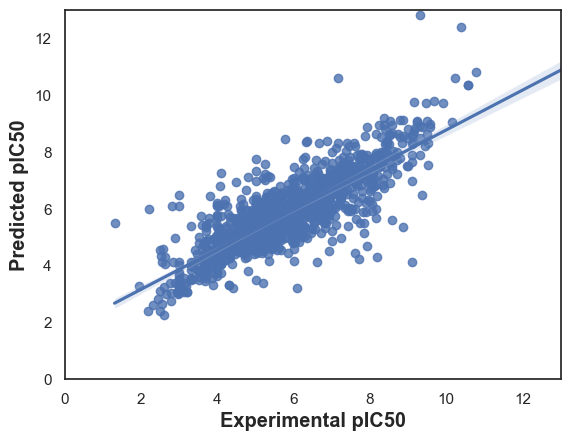

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.savefig('regression_model_scatter_plot.pdf')
plt.show()